In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [8]:
DATADIR = "C:/Datasets/TensorFlow/test_set"
CATEGORIES = ["dogs", "cats"]

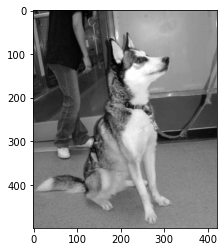

In [9]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # Pathh to cat or dog 
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [10]:
print(img_array)

[[112  64  64 ... 141 139 140]
 [125  77  67 ... 141 140 141]
 [138  94  69 ... 141 140 141]
 ...
 [130 127 134 ... 148 142 137]
 [130 127 134 ... 150 142 135]
 [130 127 134 ... 150 141 133]]


In [11]:
print(img_array.shape)

(499, 421)


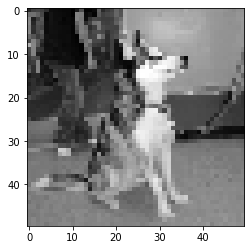

In [14]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [18]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # Pathh to cat or dog
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path): 
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        #       plt.imshow(img_array, cmap="gray")
         #       plt.show()
create_training_data()

In [19]:
print(len(training_data))

2023


In [20]:
import random
random.shuffle(training_data)

In [22]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
1
1
1
1
1
1
0


In [23]:
X = []
y = []

In [24]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [25]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [26]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [27]:
X[1]

array([[[152],
        [161],
        [175],
        ...,
        [150],
        [ 82],
        [144]],

       [[173],
        [163],
        [169],
        ...,
        [158],
        [139],
        [145]],

       [[170],
        [167],
        [170],
        ...,
        [146],
        [147],
        [146]],

       ...,

       [[174],
        [180],
        [167],
        ...,
        [181],
        [184],
        [173]],

       [[181],
        [186],
        [180],
        ...,
        [167],
        [162],
        [163]],

       [[184],
        [182],
        [190],
        ...,
        [176],
        [170],
        [164]]], dtype=uint8)